In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
def generate(nodes):
    layers = []
    for i in range(len(nodes) - 1):
        W = np.random.randn(nodes[i + 1], nodes[i])
        B = np.random.randn(nodes[i + 1],1)
        layers.append((W,B))
    return layers

In [105]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1 + np.exp(-x))

In [80]:
def forward_prop(X, L, f = sigmoid):
    cache = []
    A = X
    for li in L:
        W, B = li
        Z = W.dot(A) + B
        A = f(Z)
        cache.append(A)
    Yhat = A
    return Yhat, cache

#X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
#Y = np.array([[0, 1, 1, 0]])
#L = generate([2, 2, 1])
#Yhat, cache = forward_prop(X, L)
#print(Yhat)
#print(cache)

[[0.60108743 0.69478163 0.4476715  0.52480452]]
[array([[0.43219259, 0.63566502, 0.18746241, 0.34590808],
       [0.43219259, 0.50840616, 0.5112833 , 0.58702484]]), array([[0.60108743, 0.69478163, 0.4476715 , 0.52480452]])]


In [56]:
def loss(Y, Yhat):
    return np.sum((Y - Yhat) ** 2)

In [57]:
def interpret_binary(y):
    return (y > 0.5)*1

def score(Yhat, Y, percentage = False, interpret = interpret_binary):
    correct = interpret(Yhat) == Y
    correct_count = sum(correct.flatten())  # Yes, flatten is a bit fishy, it turns a matrix into a vector though, removing one dimension
    result = correct_count / len(Y.flatten())
    if (percentage): 
        result = result * 100
    return result
#print(score(Yhat, Y))
#print(score(Yhat, Y, True), "%")

In [109]:
def back_prop(Y, L, cache):
    #print(Y.shape, len(L), len(cache))
    Lnext = []
    A = Y
    for (W, B), Ahat in zip(reversed(L), reversed(cache)):
        #print("Ahat:\n", Ahat)
        #print("W", W)
        #print("B", B)
        E = Ahat - A
        deltaZ = E * sigmoid(Ahat, derivative=True)
        #Z = W.dot(A) + B
        #A = f(Z)
        # Z = W * A + B
        # W = (Z - B) * A^-1
        inputError = deltaZ.dot(W.T)
        delta = inputError * sigmoid(Ahat, derivative=True)
        
        print(delta/Ahat)
    return None

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[0, 1, 1, 0]])
L = generate([2, 2, 1])
#print("L1", L[0])
#print("L2", L[1])
Yhat, cache = forward_prop(X, L)
back_prop(Y, L, cache)


[[ 0.19620439 -0.07970735 -0.06054918  0.19089201]]
[[ 0.24940204 -0.44205488 -0.05286569  0.227329  ]
 [ 0.18248377 -0.0043349  -0.01848719  0.03275182]]


In [67]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[0, 0, 0, 1]])
print(X, Y)

N = generate([2, 1])
Yhat = forward_prop(X, N, sigmoid)
error = loss(Y, Yhat)
print("loss:", error)

result = score(Yhat, Y, True)
print("result:", result, "%")

[[0 0 1 1]
 [0 1 0 1]] [[0 0 0 1]]
loss: 0.981003636344341
result: 75.0 %


In [70]:
#   XOR.py-A very simple neural network to do exclusive or.
import numpy as np

epochs = 60000           # Number of iterations
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([ [0],   [1],   [1],   [0]])

def sigmoid (x): return 1/(1 + np.exp(-x))      # activation function
def sigmoid_(x): return x * (1 - x)             # derivative of sigmoid
                                                # weights on layer inputs
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

for i in range(epochs):

    # forward prop
    H = sigmoid(np.dot(X, Wh))                  # hidden layer results
    Z = sigmoid(np.dot(H, Wz))                  # output layer results
    # loss
    E = Y - Z                                   # how much we missed (error)
    # back prop
    dZ = E * sigmoid_(Z)                        # delta Z
    Wz +=  H.T.dot(dZ)                          # update output layer weights
    dH = dZ.dot(Wz.T) * sigmoid_(H)             # delta H
    Wh +=  X.T.dot(dH)                          # update hidden layer weights
    
print(Z)                # what have we learnt?

[[0.01287546]
 [0.99224042]
 [0.99224027]
 [0.00201252]]


In [86]:
for n, c in zip([1,2,3], ['a', 'b', 'c']):
    print(n,c)

1 a
2 b
3 c


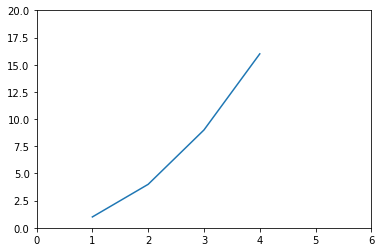

In [116]:
plt.plot([1,2,3,4], [1,4,9,16])#, 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

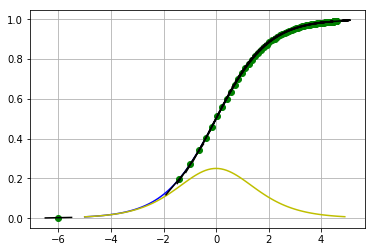

In [223]:
sigma = 0.0001
f = lambda x : 1/(1 + np.exp(-x))
fmirp = lambda x: x * (1 - x) 

x = np.arange(-5, 5, step=0.1)
plt.plot(x, f(x), 'b')
#plt.plot(x, fprim(x), 'r')
plt.plot(x, fmirp(f(x)), 'y')

y = 0.99
a = -6
plt.plot([4.5], [y], 'ro')
    
learning_rate = 0.01
for i in range(1000):
    yhat = f(a)
    e = yhat - y
    #print("error e:", e)
    yhatprim = fmirp(yhat)
    dx = 0.5
    dy = dx * yhatprim
    
    if i % 10 == 0: 
        plt.plot([a], [yhat], 'go')
        plt.plot([a-dx, a+dx], [yhat-dy, yhat+dy], 'black')
        
    a += - learning_rate * e / yhatprim
    if (abs(e) < sigma):
        break

#plt.axis([-5, 5, -1, 1])
plt.grid(True)
plt.show()

In [238]:
# one neuron with one input
W = np.random.randn(1,1)
B = np.random.randn(1,1)
#print(W, B)

X, Y = np.array([[0, 1]]), np.array([[1, 0]])  # not
#print(X,Y)

f = lambda a : 1/(1 + np.exp(-a))
fmirp = lambda a: a * (1 - a) 
Gpart = lambda X : W.dot(X) + B
#G = lambda X : f(Gpart(X))

learning_rate = 0.009

for i in range(1000):

    #forward prop
    A = Gpart(X)
    Yhat = f(A)
    E = Yhat - Y
    Loss = np.sum(E ** 2)
    if i % 20 == 0:
        print(Loss)
    if (abs(Loss) < sigma):
        print(Loss)
        break
    #back prop
    Yhatprim = fmirp(Yhat)
    dA = - learning_rate * E / yhatprim
    #print(dA.shape, E.shape)
    dW = dA.dot(X.T)
    W = W + dW
    dB = dA.dot(X.T) - E  # <-----------------
    print(dB)

print(A, Yhat, E, Loss)
print(Yhatprim, dA)


0.8413192883677586
[[-0.56583431 -1.68584787]]
[[-0.46904125 -1.4815309 ]]
[[-0.34050956 -1.21021798]]
[[-0.21470724 -0.94466639]]
[[-0.11576724 -0.73581749]]
[[-0.04481456 -0.58604603]]
[[ 0.00549442 -0.47985063]]
[[ 0.04191547 -0.40297074]]
[[ 0.06905666 -0.34567938]]
[[ 0.08986558 -0.30175457]]
[[ 0.10622994 -0.26721165]]
[[ 0.11938517 -0.23944273]]
[[ 0.13016221 -0.21669388]]
[[ 0.13913538 -0.19775272]]
[[ 0.146712   -0.18175951]]
[[ 0.15318769 -0.16809021]]
[[ 0.15878159 -0.15628226]]
[[ 0.16365916 -0.14598636]]
[[ 0.16794752 -0.13693421]]
[[ 0.17174576 -0.12891666]]
0.05831102872796144
[[ 0.17513218 -0.12176838]]
[[ 0.17816945 -0.11535712]]
[[ 0.18090825 -0.10957588]]
[[ 0.18339001 -0.10433723]]
[[ 0.1856489  -0.09956902]]
[[ 0.18771333 -0.09521129]]
[[ 0.18960713 -0.09121373]]
[[ 0.19135042 -0.08753389]]
[[ 0.19296028 -0.08413568]]
[[ 0.19445135 -0.08098823]]
[[ 0.19583619 -0.07806502]]
[[ 0.19712568 -0.0753431 ]]
[[ 0.19832925 -0.07280252]]
[[ 0.19945516 -0.07042588]]
[[ 0.2005

[[ 0.23172202 -0.00231492]]
[[ 0.23172322 -0.00231239]]
[[ 0.23172442 -0.00230986]]
0.05420601721614662
[[ 0.23172561 -0.00230734]]
[[ 0.23172681 -0.00230482]]
[[ 0.231728   -0.00230231]]
[[ 0.23172918 -0.0022998 ]]
[[ 0.23173037 -0.0022973 ]]
[[ 0.23173155 -0.0022948 ]]
[[ 0.23173273 -0.00229231]]
[[ 0.23173391 -0.00228983]]
[[ 0.23173508 -0.00228735]]
[[ 0.23173626 -0.00228487]]
[[ 0.23173743 -0.0022824 ]]
[[ 0.23173859 -0.00227994]]
[[ 0.23173976 -0.00227748]]
[[ 0.23174092 -0.00227503]]
[[ 0.23174208 -0.00227258]]
[[ 0.23174324 -0.00227014]]
[[ 0.23174439 -0.0022677 ]]
[[ 0.23174554 -0.00226527]]
[[ 0.23174669 -0.00226284]]
[[ 0.23174784 -0.00226042]]
0.05420595484377194
[[ 0.23174898 -0.002258  ]]
[[ 0.23175013 -0.00225559]]
[[ 0.23175127 -0.00225319]]
[[ 0.2317524  -0.00225079]]
[[ 0.23175354 -0.00224839]]
[[ 0.23175467 -0.002246  ]]
[[ 0.2317558  -0.00224361]]
[[ 0.23175693 -0.00224123]]
[[ 0.23175806 -0.00223886]]
[[ 0.23175918 -0.00223649]]
[[ 0.2317603  -0.00223412]]
[[ 0.231